<a href="https://colab.research.google.com/github/YunTaeHyeon/AILab/blob/main/Titanic_traindataset_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [ ]:
#데이터 셋 업로드 및 확인
data_test = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')
data_sur = pd.read_csv('/content/drive/MyDrive/titanic/gender_submission.csv')
data_train = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
print(data_train.describe())
data_train.isnull().sum()1

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#필요없는 칼럼들 제거

In [ ]:
#필요없는 칼럼들 제거
data_train.drop(['Cabin','PassengerId'], axis=1, inplace=True)
data_train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

# 성별 int형으로 변경



In [ ]:
#Sex데이터 남자 = 0, 여자는 1로 변환 및 데이터 형 변환
data_train.loc[data_train['Sex']=='male','Sex']=0
data_train.loc[data_train['Sex']=='female','Sex']=1
data_train = data_train.astype({'Sex':'int'})

data_train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

# 호칭에 따른 계급 분류(Name)


In [ ]:
#호칭에 따른 계급 분류(Name)

combine = [data_train]
title = data_train.Name.str.extract(' ([a-zA-Z]+)\.', expand=False) #expand=True면 여러 컬럼에 expand=False면 한개의 컬럼에
for df in combine:
  df['Title']=df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(data_train['Title'], data_train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [ ]:
#많이 사용안되는 이름들 맵핑
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
data_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [ ]:
#분류된 이름들 숫자로 변환
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

data_train.head(12)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1
5,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,Q,1
6,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,S,1
7,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,S,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,S,3
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,C,3


In [ ]:
#사용하여 필요없어진 Name 컬럼 제거
data_train.drop(['Name'], axis=1, inplace=True)
data_train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
Title         int64
dtype: object

Title
1    15.667311
2    70.270270
3    79.365079
4    57.500000
5    34.782609
Name: Survived, dtype: float64

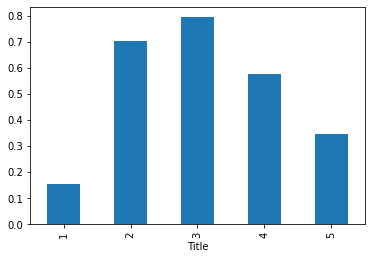

In [ ]:
data_train.groupby(['Title',])['Survived'].mean().plot(kind="bar")
data_train.groupby(['Title',])['Survived'].mean()*100

#Embarked 결측치 제거
: s가 가장 많기에 s를 삽입


In [ ]:
#Embarked 결측치 제거
print(data_train.groupby('Embarked').size())

data_train.Embarked = data_train.Embarked.fillna('S')
data_train.isnull().sum()

print(data_train.groupby('Embarked').size())

Embarked
C    168
Q     77
S    644
dtype: int64
Embarked
C    168
Q     77
S    646
dtype: int64


Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

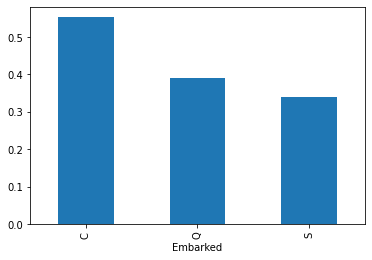

In [ ]:
data_train.groupby(['Embarked',])['Survived'].mean().plot(kind="bar")
data_train.groupby(['Embarked',])['Survived'].mean()*100

In [ ]:
combine = [data_train]
Embarked_mapping = {"C":0, "Q":1, "S":2}
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(Embarked_mapping)
data_train.Embarked

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

#Fare을 이용해 사람들을 분류


In [ ]:
data_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [1]:
#퍼센트별 인원수 정리 및 숫자로 맵핑
category = [-1, 7.910400, 14.454200, 31.000000, 512.329200]
name=[0,1,2,3]
data_train['Fare_level']=pd.cut(data_train['Fare'], category, labels= name)

data_train.head()

NameError: ignored

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Fare_level


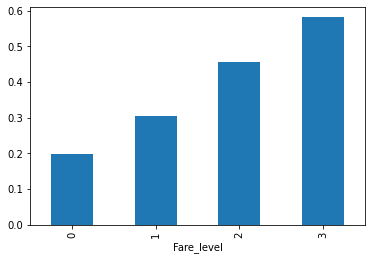

In [ ]:
data_train.groupby(['Fare_level',])['Survived'].mean().plot(kind="bar")
data_train.loc[data_train['Fare_level'].isnull() == True]

In [ ]:
data_train.dtypes
data_train.drop(['Fare'], axis=1, inplace=True)
data_train = data_train.astype({'Fare_level':'int'})

In [ ]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked,Title,Fare_level
0,0,3,0,22.0,1,0,A/5 21171,2,1,0
1,1,1,1,38.0,1,0,PC 17599,0,3,3
2,1,3,1,26.0,0,0,STON/O2. 3101282,2,2,1
3,1,1,1,35.0,1,0,113803,2,3,3
4,0,3,0,35.0,0,0,373450,2,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,211536,2,5,1
887,1,1,1,19.0,0,0,112053,2,2,2
888,0,3,1,NaN,1,2,W./C. 6607,2,2,2
889,1,1,0,26.0,0,0,111369,0,1,2


#TIcket을 이용한 사람 분류


In [ ]:
#STON/02. 과 STON/0 2. 은 가격과 pclass에서 같은 모습을 보이기에 같은 분류로 판단 

data_train['Ticket'] = data_train['Ticket'].str.replace('STON/O 2.','STON/O2.')

<ipython-input-321-9b7896e66b7f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data_train['Ticket'] = data_train['Ticket'].str.replace('STON/O 2.','STON/O2.')


In [ ]:
data_train['Ticket'].value_counts()

ticket_level = data_train['Ticket'].to_list()

In [ ]:
count={}
for i in ticket_level:
  try: count[i] +=1
  except: count[i]=1

d2 = sorted(count.items(), key=lambda x: x[1], reverse=True)

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: Ticket, Length: 891, dtype: int64


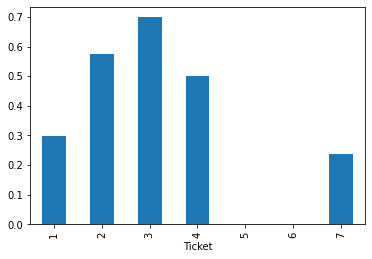

In [ ]:
combine = [data_train] 
for dataset in combine:
    dataset['Ticket'] = dataset['Ticket'].map(count)
    

print(data_train['Ticket'])
data_train.groupby(['Ticket',])['Survived'].mean().plot(kind="bar")

In [ ]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked,Title,Fare_level
0,0,3,0,22.0,1,0,1,2,1,0
1,1,1,1,38.0,1,0,1,0,3,3
2,1,3,1,26.0,0,0,1,2,2,1
3,1,1,1,35.0,1,0,2,2,3,3
4,0,3,0,35.0,0,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,1,2,5,1
887,1,1,1,19.0,0,0,1,2,2,2
888,0,3,1,NaN,1,2,2,2,2,2
889,1,1,0,26.0,0,0,1,0,1,2


In [ ]:
data_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Ticket          int64
Embarked        int64
Title           int64
Fare_level      int64
dtype: object

#동승자 유무에 따른 생존률 분석

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
df= pd.DataFrame(data)

df['Passenger'] = df['SibSp'] + df['Parch']


In [ ]:
s = df[df['Survived']==1]

p1 = pd.merge(df[df['Passenger']==0], s)
p2 = pd.merge(df[df['Passenger']!=0], s)

a = p1.size/df[df['Passenger'] == 0].size
b = p2.size/df[df['Passenger'] != 0].size

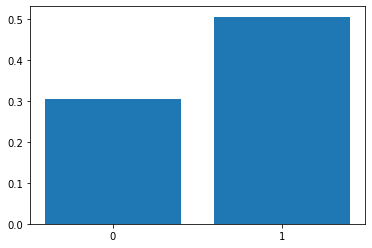

In [ ]:
x = np.arange(2)
xvalue=[0,1]
yvalue=[a,b]

plt.bar(x, yvalue)
plt.xticks(x, xvalue)

plt.show()

#동승자가 있는 사람의 생존 확률이 더 높음

In [ ]:
data_train['Passenger']= data_train['SibSp'] + data_train['Parch']

data_train.loc[data_train['Passenger']==0,'Fellow']=0
data_train.loc[data_train['Passenger']!=0,'Fellow']=1

In [ ]:
data_train = data_train.astype({'Fellow':'int'})
data_train['Fellow']
data_train.drop(['Passenger','SibSp','Parch'], axis=1, inplace=True)

In [ ]:
data_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Ticket          int64
Embarked        int64
Title           int64
Fare_level      int64
Fellow          int64
dtype: object

#나이에 따른 분류

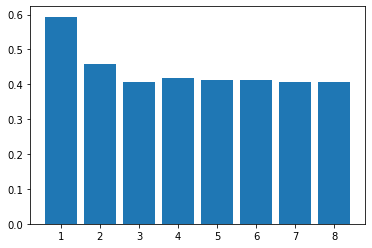

In [ ]:
count = 0
sum1=0

a1=data[data['Age'] <= 10]
a2=data[data['Age'] <= 20]
a3=data[data['Age'] <= 30]
a4=data[data['Age'] <= 40]
a5=data[data['Age'] <= 50]
a6=data[data['Age'] <= 60]
a7=data[data['Age'] <= 70]
a8=data[data['Age'] <= 80]

a8=pd.merge(a8,a7,how='outer')
a7=pd.merge(a7,a6,how='outer')
a6=pd.merge(a6,a5,how='outer')
a5=pd.merge(a5,a4,how='outer')
a4=pd.merge(a4,a3,how='outer')
a3=pd.merge(a3,a2,how='outer')
a2=pd.merge(a2,a1,how='outer')

b=data[data['Survived']==1]

d1=pd.merge(a1,b)
d2=pd.merge(a2,b)
d3=pd.merge(a3,b)
d4=pd.merge(a4,b)
d5=pd.merge(a5,b)
d6=pd.merge(a6,b)
d7=pd.merge(a7,b)
  d8=pd.merge(a8,b)


x=np.arange(8)
xvalue=[1,2,3,4,5,6,7,8]
yvalue=[len(d1)/len(a1),len(d2)/len(a2),len(d3)/len(a3),len(d4)/len(a4),
        len(d5)/len(a5),len(d6)/len(a6),len(d7)/len(a7),len(d8)/len(a8)]

plt.bar(x, yvalue)
plt.xticks(x, xvalue)

plt.show()

In [ ]:
#age에 있는 결측치 채우기
print(data_train['Age'].median())
data_train.loc[data_train['Age'].isnull(),'Age']=data_train['Age'].median()

data_train

28.0


,Survived,Pclass,Sex,Age,Ticket,Embarked,Title,Fare_level,Fellow
0,0,3,0,22.0,1,2,1,0,1
1,1,1,1,38.0,1,0,3,3,1
2,1,3,1,26.0,1,2,2,1,0
3,1,1,1,35.0,2,2,3,3,1
4,0,3,0,35.0,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,1,2,5,1,0
887,1,1,1,19.0,1,2,2,2,0
888,0,3,1,28.0,2,2,2,2,1
889,1,1,0,26.0,1,0,1,2,0


In [ ]:
#10살 단위로 분류
data_train.loc[data_train['Age']<=80,'Age_class']=7
data_train.loc[data_train['Age']<=70,'Age_class']=6
data_train.loc[data_train['Age']<=60,'Age_class']=5
data_train.loc[data_train['Age']<=50,'Age_class']=4
data_train.loc[data_train['Age']<=40,'Age_class']=3
data_train.loc[data_train['Age']<=30,'Age_class']=2
data_train.loc[data_train['Age']<=20,'Age_class']=1
data_train.loc[data_train['Age']<=10,'Age_class']=0

data_train

,Survived,Pclass,Sex,Age,Ticket,Embarked,Title,Fare_level,Fellow,Age_class
0,0,3,0,22.0,1,2,1,0,1,2.0
1,1,1,1,38.0,1,0,3,3,1,3.0
2,1,3,1,26.0,1,2,2,1,0,2.0
3,1,1,1,35.0,2,2,3,3,1,3.0
4,0,3,0,35.0,1,2,1,1,0,3.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,1,2,5,1,0,2.0
887,1,1,1,19.0,1,2,2,2,0,1.0
888,0,3,1,28.0,2,2,2,2,1,2.0
889,1,1,0,26.0,1,0,1,2,0,2.0


In [ ]:
data_train = data_train.astype({'Age_class':'int'})

data_train.drop(['Age'], axis=1, inplace=True)

print(data_train)

     Survived  Pclass  Sex  Ticket  Embarked  Title  Fare_level  Fellow  \
0           0       3    0       1         2      1           0       1   
1           1       1    1       1         0      3           3       1   
2           1       3    1       1         2      2           1       0   
3           1       1    1       2         2      3           3       1   
4           0       3    0       1         2      1           1       0   
..        ...     ...  ...     ...       ...    ...         ...     ...   
886         0       2    0       1         2      5           1       0   
887         1       1    1       1         2      2           2       0   
888         0       3    1       2         2      2           2       1   
889         1       1    0       1         0      1           2       0   
890         0       3    0       1         1      1           0       0   

     Age_class  
0            2  
1            3  
2            2  
3            3  
4            3

In [ ]:
data_train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Ticket        int64
Embarked      int64
Title         int64
Fare_level    int64
Fellow        int64
Age_class     int64
dtype: object

In [ ]:
data_train.to_csv('/content/drive/MyDrive/titanic/train_pre.csv')